定量マクロ経済学_期末レポート
※授業で教授が記されたコードを参考に分析をしました。

課題を解くための準備

In [2]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [3]:
# utility function

def util(cons, gamma):
    return max(cons, 1e-4)**(1.0-gamma)/(1.0-gamma)

In [4]:
# setting parameters

gamma = 2.0 # relative risk aversion
beta = 0.985**20 # time discount factor
r = 1.025**20 - 1.0 # interest rate
JJ = 3 # 期間数
l = np.array([0.8027, 1.0, 1.2457]) # 若年期の労働所得, 生産性・中生産性・高生産性
NL = 3 # 若年期の労働所得パターン数

# 各個人の中年期の労働所得は若年期の労働所得に依存 その確率はこの遷移行列によって決まる
prob = np.array([
    [0.7451, 0.2528, 0.0021],
    [0.1360, 0.7281, 0.1360],
    [0.0021, 0.2528, 0.7451]
]) 

# 1期目の所得状態の「確率分布」mu_1 が、probを通じて、2期目にどう分布するか
mu_1 = np.array([1.0/NL, 1.0/NL, 1.0/NL])
mu_2 = np.zeros(NL)

for il in range(NL):
    for ilp in range(NL):
        mu_2[ilp] += prob[il, ilp]*mu_1[il] 

In [5]:
# grids
a_l = 0.0
a_u = 2.0
NA = 100
a = np.linspace(a_l, a_u, NA)

1. 年金がない場合、横軸に若年期期初の利子を除く資産、縦軸に次期の利子を除く資産とする貯蓄の政策関数のグラフをそれぞれの生産性について描け。
全て同じ1つの図に描くこと。異なる生産性での貯蓄行動を比較し、その経済学的な直感も述べよ。

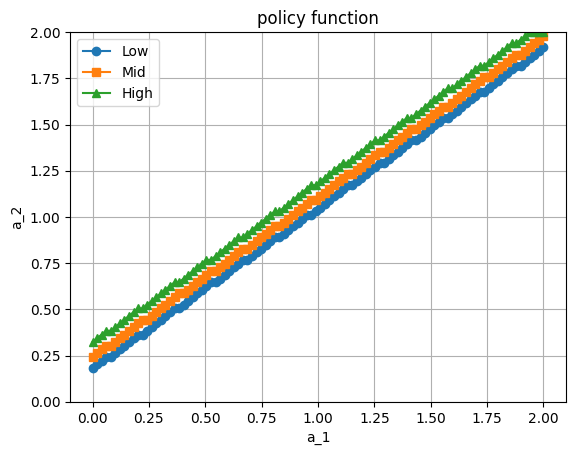

In [ ]:
# initialization
v = np.zeros((JJ, NA, NL))
iaplus = np.zeros((JJ, NA, NL), dtype=int)
aplus = np.zeros((JJ, NA, NL))

# backward induction

# period 3
for ia in range(NA):
    v[2, ia, :] = util(0 + (1.0+r)*a[ia], gamma)

 # period 2
for il in range(NL):
    for ia in range(NA):
        reward = np.zeros(NA)
        for iap in range(NA):
            reward[iap] = util(l[il] + (1.0+r)*a[ia] - a[iap], gamma) + beta*v[2, iap, 0]
        iaplus[1, ia, il] = np.argmax(reward)
        aplus[1, ia, il] = a[iaplus[1, ia, il]]
        v[1, ia, il] = reward[iaplus[1, ia, il]]

# period 1
for il in range(NL):
    for ia in range(NA):
        reward = np.zeros(NA)
        for iap in range(NA):

            EV = 0.0
            for ilp in range(NL):
                EV += prob[il, ilp]*v[1, iap, ilp]

            reward[iap] = util(l[il] + (1.0+r)*a[ia] - a[iap], gamma) + beta*EV

        iaplus[0, ia, il] = np.argmax(reward)
        aplus[0, ia, il] = a[iaplus[0, ia, il]]
        v[0, ia, il] = reward[iaplus[0, ia, il]]

#図の描写
plt.figure()
plt.plot(a, aplus[0, :, 0], marker='o', label='Low')
plt.plot(a, aplus[0, :, 1], marker='s', label='Mid')
plt.plot(a, aplus[0, :, 2], marker='^', label='High')
plt.title("policy function")
plt.xlabel("a_1")
plt.ylabel("a_2")
plt.ylim(a_l, a_u)
plt.grid(True)
plt.legend()
plt.show()
